[INFO] Baixando/carregando CIFAR-10 em data/downloaded


100%|██████████| 170M/170M [00:36<00:00, 4.67MB/s] 


Extracting data/downloaded\cifar-10-python.tar.gz to data/downloaded
Files already downloaded and verified


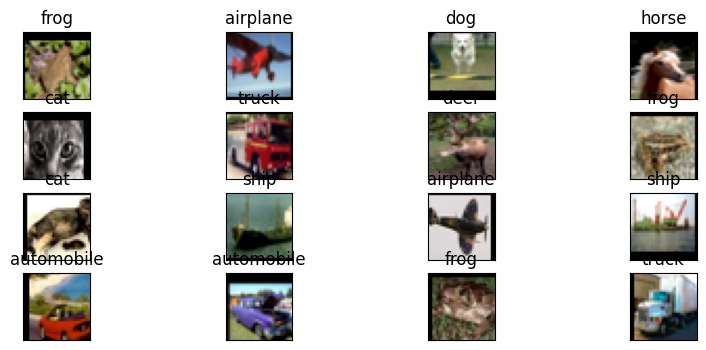

In [4]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import sys
import os


# Pega o diretório atual onde o notebook está rodando
current_dir = os.getcwd()

# Sobe um nível para chegar na raiz do projeto (project_vgg/)
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Adiciona ao path do Python se já não estiver lá
if project_root not in sys.path:
    sys.path.append(project_root)

from data.data_setup import create_dataloaders, get_transforms

def denormalize(tensor):
    """Reverte a normalização aplicada às imagens para visualização."""

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    # Tensor: (C, H, W) -> (H, W, C)
    img = tensor.permute(1, 2, 0).cpu().numpy()
    img = std * img + mean
    img = np.clip(img, 0, 1)
    return img

def show_batch():
    train_loader, _, _, classes = create_dataloaders(batch_size=16)
    dataiter = iter(train_loader)
    images, labels = next(dataiter)

    fig = plt.figure(figsize=(10, 4))
    for idx in range(len(images)):
        ax = fig.add_subplot(4, 4, idx+1, xticks=[], yticks=[])
        img = denormalize(images[idx])
        ax.imshow(img)
        ax.set_title(classes[labels[idx]])
    
    plt.show()
    plt.close()

if __name__ == "__main__":
    show_batch()